# Chapter 6: Compare NOAA/NSIDC SIC with Surface Air Temperature

## Learning Objectives
Investigate how surface air temperature affects sea ice concentration.

This notebook uses surface air temperature anomalies from the NOAA [National Centers for Environmental Prediction (NCEP)](https://www.emc.ncep.noaa.gov/emc.php) Reanalysis products. The data was downloaded from the NOAA [Physcial Sciences Laboratory Monthly/Seasonal Climate Composites](https://psl.noaa.gov/cgi-bin/data/composites/printpage.pl) web application.

### Import relevant packages

In [1]:
from datetime import datetime, date, timedelta
from netCDF4 import Dataset

import xarray as xr
import numpy as np
import numpy.ma as ma
import pandas
import packaging
import aiohttp

import fsspec
import pystac
import netCDF4
from netCDF4 import Dataset
import h5netcdf
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Open the NCEP air temperature anomaly NetCDF file

**Note:** This data file was downloaded from the NOAA [Physcial Sciences Laboratory Monthly/Seasonal Climate Composites](https://psl.noaa.gov/cgi-bin/data/composites/printpage.pl) web application and was reprojected to match the CDR grid and resolution. It is included with these notebooks for easy access and use in this learning notebook.

In [2]:
# Read in the NCEP air temparture anomaly file with xarray
ncep_air_temp_fn = 'data_files/ncep-air-temp-3411crs-oct2020.nc'
ncep_air_temp_nc = xr.open_dataset(ncep_air_temp_fn)
ncep_air_temp_nc

<xarray.Dataset> Size: 551kB
Dimensions:              (x: 304, y: 448)
Coordinates:
  * x                    (x) float64 2kB -3.838e+06 -3.812e+06 ... 3.738e+06
  * y                    (y) float64 4kB -5.338e+06 -5.312e+06 ... 5.838e+06
Data variables:
    polar_stereographic  |S1 1B ...
    Band1                (y, x) float32 545kB ...
Attributes:
    Conventions:                  COARDS
    description:                  Computed from the web page https://psl.noaa...
    GDAL:                         GDAL 3.9.1, released 2024/06/22
    GDAL_NETCDF_DIM_EXTRA:        {time}
    GDAL_NETCDF_DIM_time_DEF:     [1 6]
    GDAL_NETCDF_DIM_time_VALUES:  1935792
    history:                      Fri Aug 30 14:26:39 2024: GDAL CreateCopy( ...
    title:                        Composite Anomaly

### Extract the air temperature data

In [3]:
# From the listing above, we see that the data variable is called "Band1". Extract that into a numpy array
ncep_air_temp_var = ncep_air_temp_nc.variables['Band1']
ncep_air_temp = np.array(ncep_air_temp_var.data)

# This data set happens to be rotated compared to our sea ice data so need to flip it so we can graph them together
ncep_air_temp_flip = np.flipud(ncep_air_temp)

### Plot the air temperature data
Note that the white line is an artifact of the reprojection of the data and is a swath of missing data along the prime meridian.

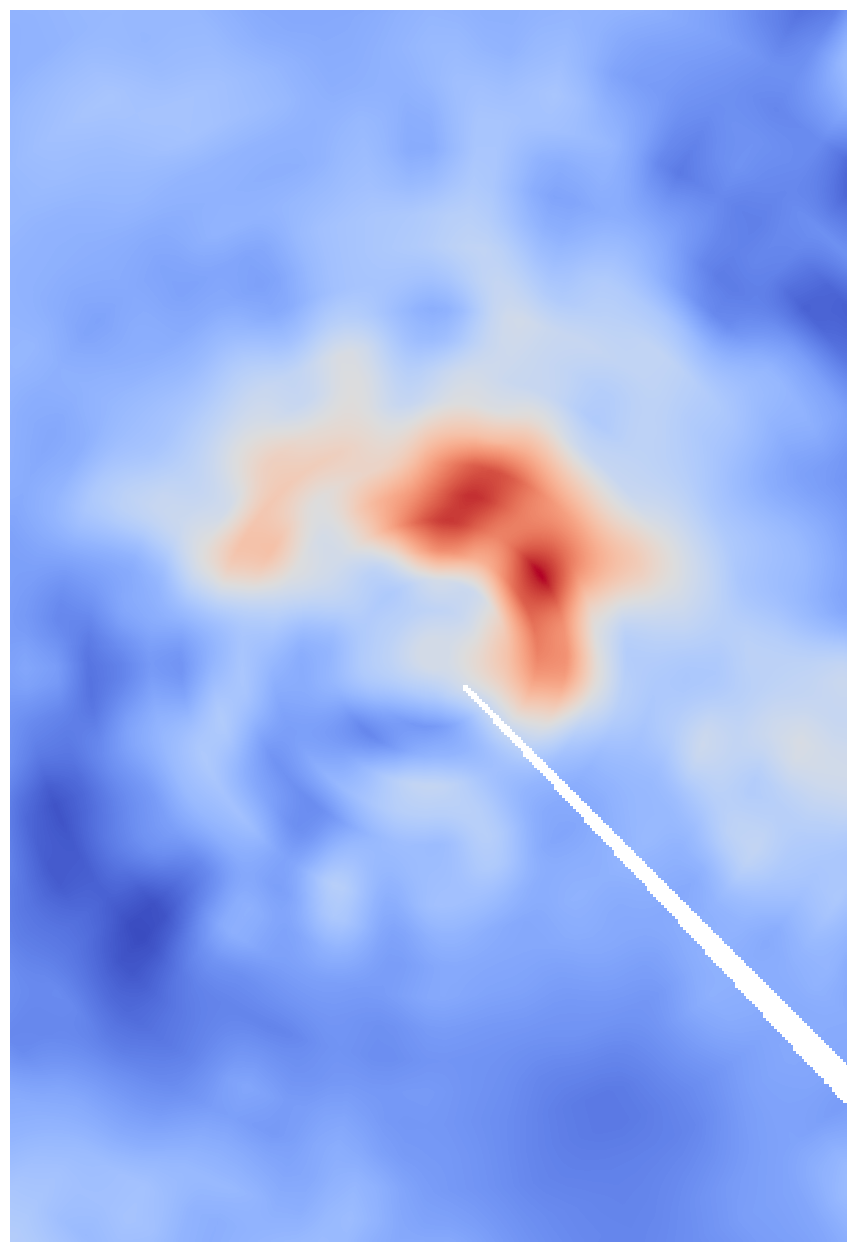

In [4]:
fig, ax1 = plt.subplots(figsize=(22, 16))
air_temp_plot = ax1.imshow(ncep_air_temp_flip, cmap='coolwarm', interpolation='bilinear')
plt.axis('off')
plt.show()

### Open CDR data

This will be a repeat of code we used in Notebooks 2 and 3 but for the Northern Hemisphere monthly data.

**TBD need to make this a monthly file**

In [5]:
collection = pystac.Collection.from_file('https://noaadata.apps.nsidc.org/NOAA/G02202_V4/stac/collection.json')
# List all the Items and their Item IDs
collection.describe()

* <Collection id=noaa-cdr-sea-ice-concentration>
  * <Item id=seaice_conc_daily_sh_2023_v04r00>
  * <Item id=seaice_conc_daily_sh_2022_v04r00>
  * <Item id=seaice_conc_daily_sh_2021_v04r00>
  * <Item id=seaice_conc_daily_sh_2020_v04r00>
  * <Item id=seaice_conc_daily_sh_2019_v04r00>
  * <Item id=seaice_conc_daily_sh_2018_v04r00>
  * <Item id=seaice_conc_daily_sh_2017_v04r00>
  * <Item id=seaice_conc_daily_sh_2016_v04r00>
  * <Item id=seaice_conc_daily_sh_2015_v04r00>
  * <Item id=seaice_conc_daily_sh_2014_v04r00>
  * <Item id=seaice_conc_daily_sh_2013_v04r00>
  * <Item id=seaice_conc_daily_sh_2012_v04r00>
  * <Item id=seaice_conc_daily_sh_2011_v04r00>
  * <Item id=seaice_conc_daily_sh_2010_v04r00>
  * <Item id=seaice_conc_daily_sh_2009_v04r00>
  * <Item id=seaice_conc_daily_sh_2008_v04r00>
  * <Item id=seaice_conc_daily_sh_2005_v04r00>
  * <Item id=seaice_conc_daily_sh_2004_v04r00>
  * <Item id=seaice_conc_daily_sh_2003_v04r00>
  * <Item id=seaice_conc_daily_sh_2002_v04r00>
  * <Item i

In [37]:
items = list(collection.get_all_items())
item_ids = [i.id for i in items]
monthly = [i in item_ids if i.contains("monthly_nh")]
#indices = [i for i, s in enumerate(item_ids) if 'monthly_nh' in s]
#indices
# items[0].id
#items
#l = [items.index(i) for i in items if 'monthly_nh' in i]
#l
#type(items[0])
#type(item_ids[0])
monthly
#indices

SyntaxError: expected 'else' after 'if' expression (2865080407.py, line 3)

In [21]:
items[0].id

'seaice_conc_daily_sh_2023_v04r00'

In [ ]:
#monthly_nh_item = collection.get_item("seaice_conc_monthly_nh_197811_202312_v04r00", recursive=True)
#monthly_nh_item

In [ ]:
# netcdf_url = monthly_nh_item.assets['netcdf'].href # Won't work until the STAC is updated after a data update
#netcdf_url = 'https://noaadata.apps.nsidc.org/NOAA/G02202_V4/north/aggregate/seaice_conc_monthly_nh_197811_202403_v04r00.nc'
#netcdf_url

In [ ]:
#fs = fsspec.filesystem('https')
#fs

In [ ]:
#ds = xr.open_dataset(fs.open(netcdf_url))
#ds

In [ ]:
# Pull out sea ice concentration variable into numpy array. Note that the variable name for the monthly data is cdr_seaice_conc_monthly
#time_var = ds.variables['time']
#time = np.array(time_var.data)
#ans = np.where(time == np.datetime64(datetime(2020, 10, 1)))
#time[ans]

In [ ]:
# Pull out sea ice concentration variable into numpy array. Note that the variable name for the monthly data is cdr_seaice_conc_monthly
#cdr_seaice_conc_var = ds.variables['cdr_seaice_conc_monthly']
#cdr_seaice_conc = np.array(cdr_seaice_conc_var.data)
#cdr_seaice_conc

In [ ]:
# Here we are pulling out one month from our file. We want October 2020
#seaice_conc_1d = cdr_seaice_conc[ans[0],:,:]
#seaice_conc_1d

In [ ]:
collection = pystac.Collection.from_file('https://noaadata.apps.nsidc.org/NOAA/G02202_V4/stac/collection.json')
monthly_nh_item = collection.get_item("seaice_conc_monthly_nh_197811_202312_v04r00", recursive=True)
# netcdf_url = monthly_nh_item.assets['netcdf'].href # Won't work until the STAC is updated after a data update
netcdf_url = 'https://noaadata.apps.nsidc.org/NOAA/G02202_V4/north/aggregate/seaice_conc_monthly_nh_197811_202403_v04r00.nc'
fs = fsspec.filesystem('https')
ds = xr.open_dataset(fs.open(netcdf_url))

# Pull out sea ice concentration variable into numpy array. Note that the variable name for the monthly data is cdr_seaice_conc_monthly
cdr_seaice_conc_var = ds.variables['cdr_seaice_conc_monthly']
cdr_seaice_conc = np.array(cdr_seaice_conc_var.data)

# We want to extract Oct 2020 data. Find index where that occurs.
time_var = ds.variables['time']
time = np.array(time_var.data)
oct_index = np.where(time == np.datetime64(datetime(2020, 10, 1)))

# Here we are pulling out the Oct 2020 data from our cdr_seaice_conc variable. We want October 2020
seaice_conc_1d = cdr_seaice_conc[oct_index[0],:,:]

### Plot sea ice

In [ ]:
# Filter out any concentrations less than 15%
#sic_15 = ma.masked_outside(seaice_conc_np_2d_percent, 15, 255)
#filter out the ocean pixels = 0
ocean = ma.masked_outside(seaice_conc_1d, 0, 0)

# Only keep sea ice conentration i.e. Remove the land (254)
sic_15 = ma.masked_outside(seaice_conc_1d, .15, 1)

# filter out the land pixels = 2.54
land = ma.masked_outside(seaice_conc_1d, 2.54, 2.54)
coast = ma.masked_outside(seaice_conc_1d, 2.53, 2.53)
lakes = ma.masked_outside(seaice_conc_1d, 2.52, 2.52)

fig, ax1 = plt.subplots(figsize=(22, 16))
seaice_15_plot = ax1.imshow(sic_15, cmap='Blues_r', interpolation='none')
land_plot = ax1.imshow(land, cmap='Accent_r', interpolation='none')
coast_plot = ax1.imshow(coast, cmap='Accent_r', interpolation='none')
ocean_plot = ax1.imshow(ocean, cmap='PuBu_r', interpolation='none')
lake_plot = ax1.imshow(lakes, cmap='PuBu_r', interpolation='none')
plt.axis('off')
plt.show()

### Plot the two together

In [ ]:
# Filter out any concentrations less than 15%
#sic_15 = ma.masked_outside(seaice_conc_np_2d_percent, 15, 255)
#filter out the ocean pixels = 0
ocean = ma.masked_outside(seaice_conc_1d, 0, 0)

# Only keep sea ice conentration i.e. Remove the land (254)
sic_15 = ma.masked_outside(seaice_conc_1d, .15, 1)

# filter out the land pixels = 2.54
land = ma.masked_outside(seaice_conc_1d, 2.54, 2.54)
coast = ma.masked_outside(seaice_conc_1d, 2.53, 2.53)
lakes = ma.masked_outside(seaice_conc_1d, 2.52, 2.52)

fig, ax1 = plt.subplots(figsize=(22, 16))
ncep = ax1.imshow(ncep_air_temp_flip, cmap='coolwarm')
seaice_15_plot = ax1.imshow(sic_15, cmap='Blues_r', interpolation='none', alpha=0.3)
land_plot = ax1.imshow(land, cmap='Accent_r', interpolation='none')
coast_plot = ax1.imshow(coast, cmap='Accent_r', interpolation='none')
ocean_plot = ax1.imshow(ocean, cmap='PuBu_r', interpolation='none', alpha=0.3)
lake_plot = ax1.imshow(lakes, cmap='PuBu_r', interpolation='none')
plt.axis('off')
plt.show()